In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/Admin/Downloads/BlinkIT Grocery Data.csv")

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.count()


Item Fat Content             8523
Item Identifier              8523
Item Type                    8523
Outlet Establishment Year    8523
Outlet Identifier            8523
Outlet Location Type         8523
Outlet Size                  8523
Outlet Type                  8523
Item Visibility              8523
Item Weight                  8523
Sales                        8523
Rating                       8523
dtype: int64

In [5]:
df.tail()


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,0.0,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,0.0,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,0.0,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,0.0,97.8752,4.0
8522,Regular,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,0.0,112.2544,4.0


In [6]:
df.shape


(8523, 12)

In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat']


In [9]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat':'Low Fat'})

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [11]:
total_sales = df['Sales'].sum()

In [12]:
print(total_sales)

1201681.4928000001


In [14]:
avg_sales = df['Sales'].mean()
print(avg_sales)

140.99278338613166


In [15]:
no_of_items_sold = df['Sales'].count()

In [16]:
avg_rating = df['Rating'].mean()

### ***KPI REQUIREMENTS***

In [19]:
print(f'Total Sales: ${total_sales:,.0f}') 
print(f'Average Sales: ${avg_sales:,.0f}') 
print(f'No. of Items Sold: ${no_of_items_sold:,.0f}') 
print(f'Average Rating: ${avg_rating:,.0f}') 

Total Sales: $1,201,681
Average Sales: $141
No. of Items Sold: $8,523
Average Rating: $4


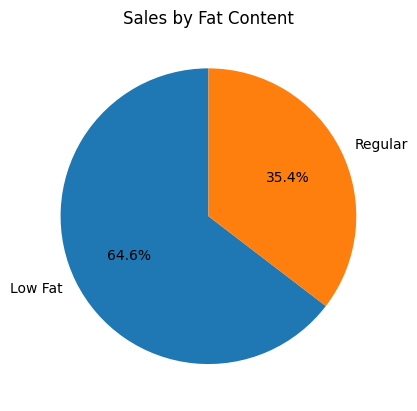

In [44]:
sales_by_fat = df.groupby("Item Fat Content")['Sales'].sum()
plt.pie(sales_by_fat,labels = sales_by_fat.index,
        autopct='%.1f%%',
        startangle=90)
plt.title('Sales by Fat Content')
# plt.axis('equal')
plt.show()

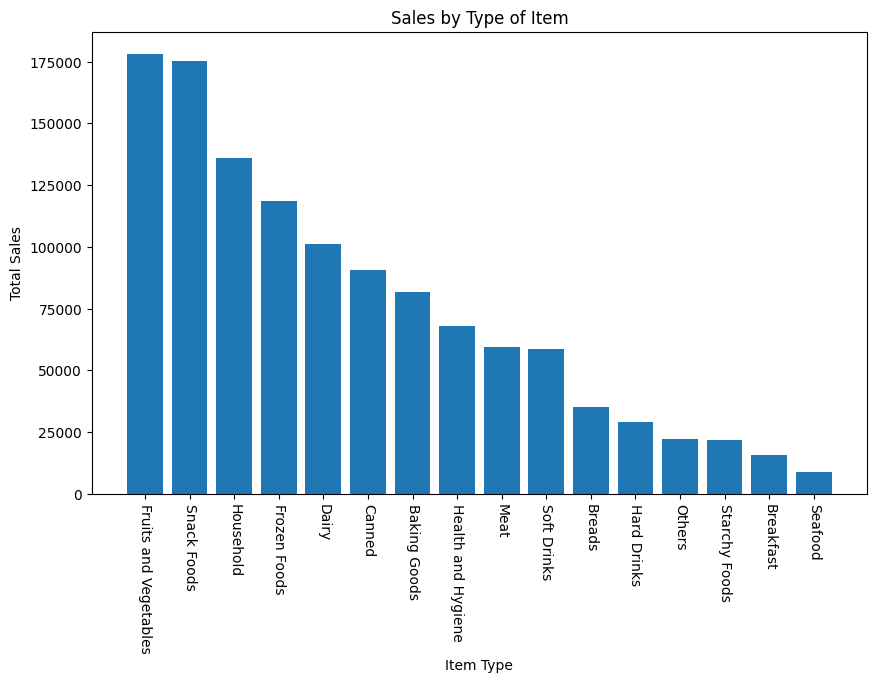

In [50]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Sales by Type of Item")
plt.show()

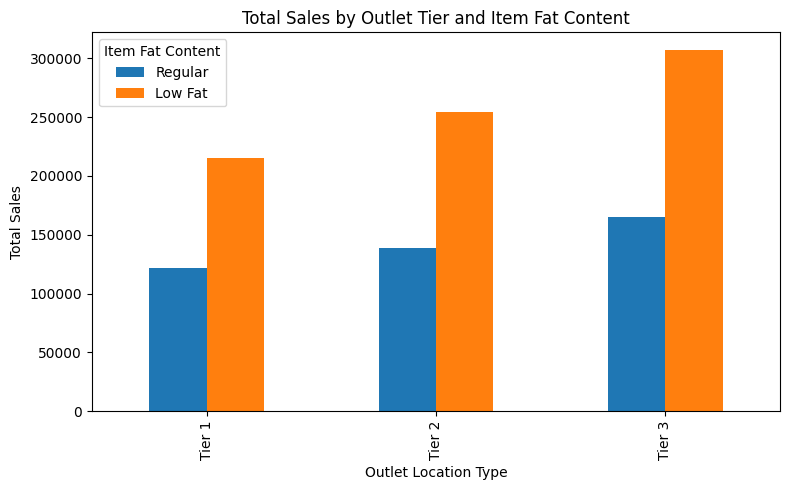

In [62]:
grouped = (
    df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales']
      .sum()
      .unstack()[['Regular', 'Low Fat']]
)

ax = grouped.plot(kind='bar', figsize=(8, 5))

ax.set_title('Total Sales by Outlet Tier and Item Fat Content')
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()


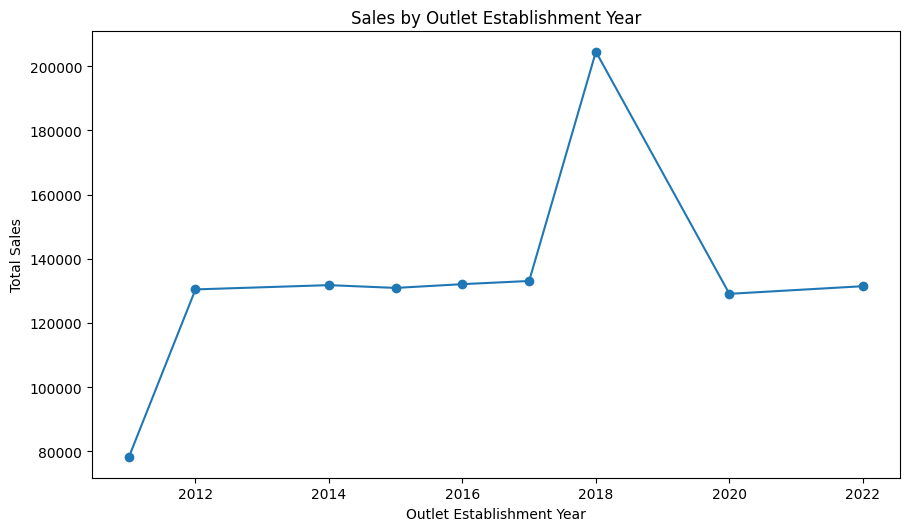

In [67]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o')
plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

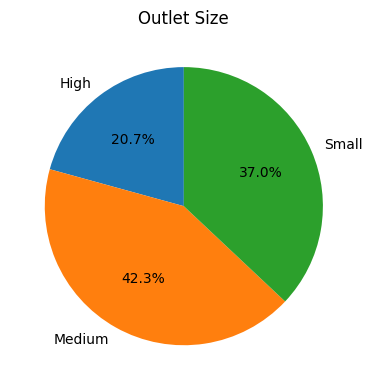

In [70]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()


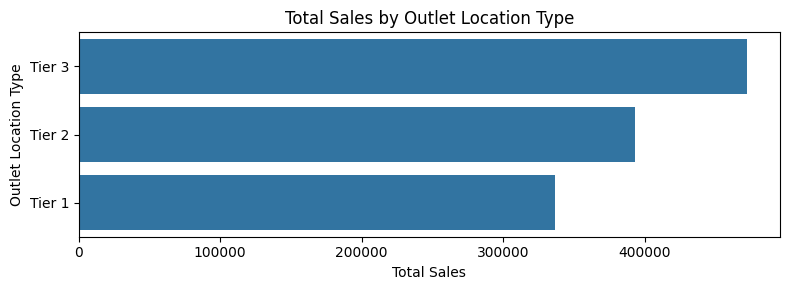

In [71]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()

